#AKSHANSH SRIVASTAVA#
1930198@kiit.ac.in

#THE SPARKS FOUNDATION GRIP#
#DOMAIN: COMPUTER VISION AND IOT#
https://github.com/22akshansh

https://www.linkedin.com/in/akshansh-srivastava-65620b212
# TASK Color Identification in images#

In this notebook, I have used machine learning algorithm, `KMeans`, to extract colors from a give image. I will use `OpenCV2` for image manipulation, apply `KMeans` to identify the major colors and then plot the information using `Matplotlib`.

## Import libraries

Let's first import necessary libraries. We need `sklearn` for KMeans algorithm, `matplotlib.pyplot` for plotting graphs, `numpy` to work with arrays, `cv2` to work with image data, `collections` to use Counter to count values, `rgb2lab` to convert RGB values and `deltaE_cie76` to calculate similarity between colors.

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Working with OpenCV

Let's first read a sample image and understand basic operations that we can do on it.

The type of this input is <class 'numpy.ndarray'>
Shape: (667, 500, 3)


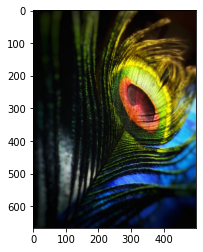

In [13]:
image = cv2.imread('//content/Sample Img-1.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order `BLUE GREEN RED` i.e. BGR. Thus, we need to convert it into `REG GREEN BLUE` i.e. RGB.

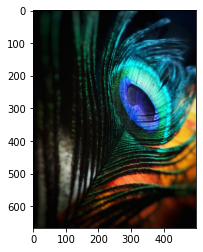

In [14]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

The image can also be converted to grayscale if needed.

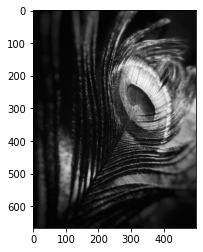

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.

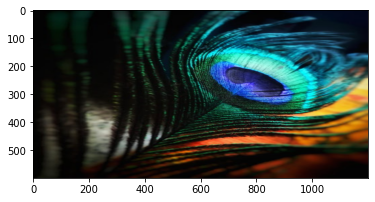

In [16]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## Color Identification

Not that we know a bit about OpenCV, let's start identifying colors from an image.

First, we will define a function that can give us the `hex` values of our the colors that we will identify.

In [17]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

I have combined all the steps in two method.

In [18]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [19]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([32.08080786, 37.63149844, 29.04950451]),
 array([ 32.88521991, 124.31304288, 159.41906797]),
 array([137.21236641, 145.90244275, 121.6989313 ]),
 array([10.10134546, 11.1563426 ,  9.18052939]),
 array([227.46602196, 142.77156299,  46.19027705]),
 array([27.62687065, 76.01029782, 81.10923841]),
 array([131.85686322,  66.06850991,  21.59909469]),
 array([ 64.55723235, 213.33152999, 212.84709567])]

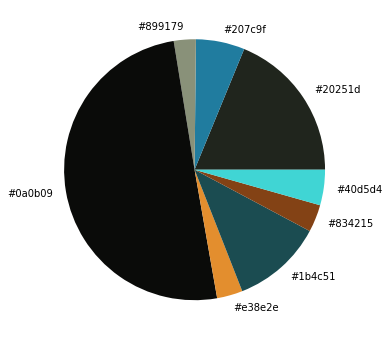

In [20]:
get_colors(get_image('/content/Sample Img-1.jpeg'), 8, True)

## Conclusion

In this notebook, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.